<a href="https://colab.research.google.com/github/zhaotianjing/ASA_workshop/blob/main/2024_Mixed_Models_for_Agricultural_Science_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Simple linear regression

Regression analysis is a statistical methodology to
 - (i) describe the relationship between a response variable ($\mathbf{y}$) and a set of predictor variables ($\mathbf{x}$) and to
 - (ii) predict the values of the response variable based on those of the predictor variables.

* Simple linear regression: only one $\mathbf{x}$ variable.
* Multiple linear regression: more than one $\mathbf{x}$ variables.

## 2.1 Model equation





Given a vector of response variable $\mathbf{y}$ and a vector of predictor variable $\mathbf{x}$, the formula for a simple linear regression is:

$$ \mathbf{y} = \mathbf{1}\beta_0 + \mathbf{x}\beta_1  + \boldsymbol{\epsilon} $$


### Model assumptions
- $\epsilon_i$ are uncorrelated, zero-mean, equal-variance random variables:

$$ E(\epsilon_i) = 0, Var(\epsilon_i) = \sigma^2, i = 1,...,n$$
$$Cov(\epsilon_i, \epsilon_j) = 0, 1 \leq i \neq j \leq n$$


### Properties of $y_i$
Given $x_i$, the distributions of the responses $y_i$ have the following properties:
* The response $y_i$ is the sum of two terms:
  * The mean of $y_i$: $E(y_i) = \beta_0 + \beta_1 x_i$.
 * The random error $\epsilon_i$, which has zero-mean.

* $\epsilon_i$ have constant variance $\Rightarrow$ $y_i$ have the same constant variance (regardless of the values of $x_i$: $Var(y_i) = \sigma_2$, $i = 1,...,n$).
* $\epsilon_i$ are uncorrelated $\Rightarrow$ $y_i$ are uncorrelated: $Cov(y_i, y_j) = 0$, $1 \leq i \neq j \leq n$.

### Unknown parameters
- $\beta_0$ is the regression intercept (the value of $E(y_i)$ when $x_i=0$)
- $\beta_1$ is the regression slope (the change in $E(y_i)$ per unit change of $x_i$)
- $\sigma^2$ is the error variance

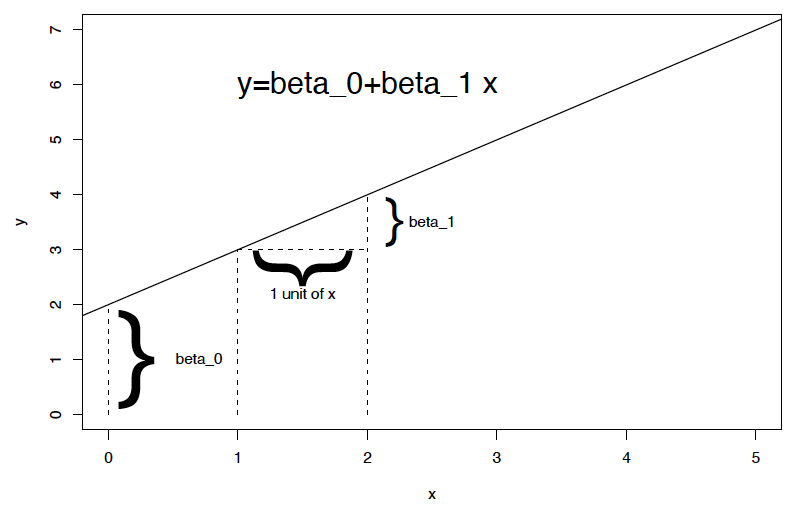

## 2.2 Least Squares Estimators

For a given line: $\beta_0 + \beta_1 \mathbf{x}$, the sum of squared vertical deviations of the observations from the corresponding points on the line is:
$$
Q(\beta_0, \beta_1) =\sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2 $$

* $\beta_0 + \beta_1 x_i$ is the point on the line with the
same x-coordinate as the ith observation point $x_i$.
* The least squares (LS) principle is to fit the observed data by minimizing the sum of squared vertical deviations.
LS line has the smallest sum of squared vertical deviations
among all straight lines.
* LS estimators of $\beta_0$, $\beta_1$ are the pair of values $\beta_0$, $\beta_1$ that minimize the function $Q(\beta_0, \beta_1)$. This leads to the normal equations.

visualization for simple linear regression: https://setosa.io/ev/ordinary-least-squares-regression/

## 2.3 Example

Suppose we have a dataset containing information about the amount of fertilizer used and the yield of crops.



### Creating data

In [ ]:
# Set seed for reproducibility
set.seed(0)

# data simulation
n = 100  #number of observations
b0 = 10 #y-intercept (b0)
b1 = 5  #Slope (b1)

x = runif(n, 0, 20)   # Fertilizer_Amount ranging from 0 to 20
e = rnorm(n, mean = 0, sd = 10)  # Generate normally distributed noise, mean=0, standard deviation=5
y = b0 + b1 * x + e # Calculate Crop_Yield (y)

# Create a DataFrame to hold the simulated data
df = data.frame(Fertilizer_Amount = x, Crop_Yield = y)
head(df) # Display the first a few rows of the DataFrame

,Fertilizer_Amount,Crop_Yield
,<dbl>,<dbl>
1,17.933944,102.33109
2,5.310173,32.78384
3,7.442478,71.62604
4,11.457067,59.33195
5,18.164156,100.27200
6,4.033639,32.66961


### Exploratory data analysis

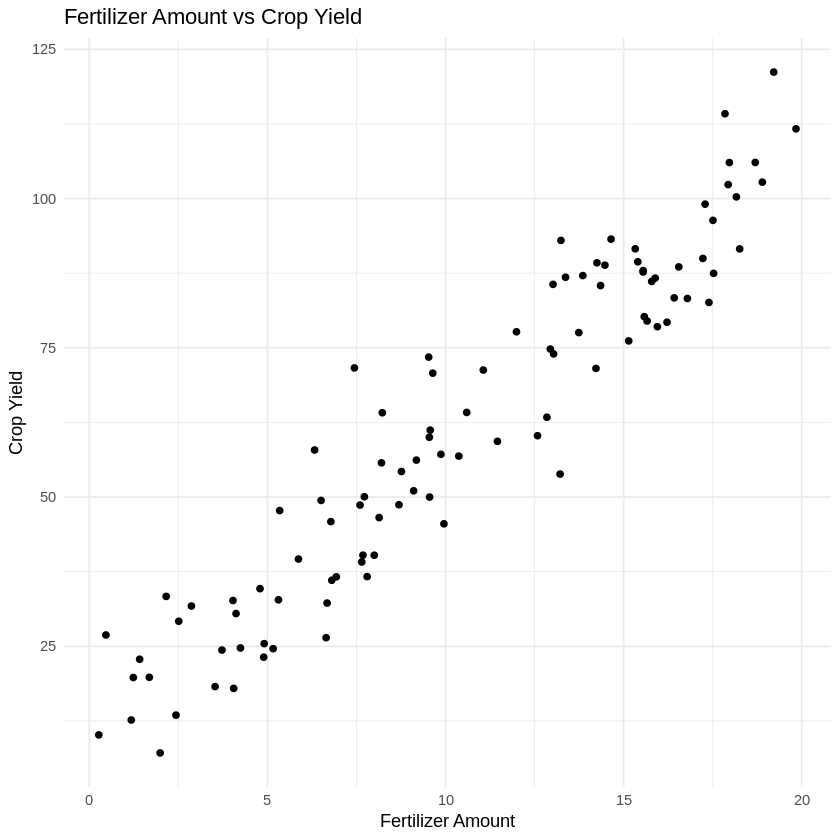

In [ ]:
library(ggplot2)

# Create a scatter plot
ggplot(df, aes(x = Fertilizer_Amount, y = Crop_Yield)) +
  geom_point() +  # Scatter plot points
  labs(title = "Fertilizer Amount vs Crop Yield",
       x = "Fertilizer Amount",
       y = "Crop Yield") +
  theme_minimal()  # Set a minimal theme for the plot

### Fitting a simple linear regression model

In [ ]:
# Split the data into training and testing sets
set.seed(1)
train_index = sample(1:nrow(df), size = 0.7 * nrow(df))  # 70% for training
df_train = df[train_index,]
df_test = df[-train_index,]

# Prepare test set features and target
X_test = df_test$Fertilizer_Amount
y_test = df_test$Crop_Yield

**Question**: we hypothesize that crop yield is equal to a baseline amount plus something times the fertilizer amount, which is continuous. What linear model code do we use ([cheat sheet](https://lindeloev.github.io/tests-as-linear/linear_tests_cheat_sheet.pdf))? Use the training data to create the model.

**Question**: from this data, does fertilizer have a statistically significant effect on crop yield? Justify your answer using the linear model.

### Mean Squared Error

In [ ]:
# Compare the predicted values to the actual values
# You can use Mean Squared Error (MSE) or any other metric as needed
mse  = mean((y_pred - y_test)^2)
rmse = sqrt(mse)  # Root Mean Squared Error
cat('Mean Squared Error (MSE):', mse, '\n')  # Evaluate the model using Mean Squared Error
cat('Root Mean Squared Error:', rmse, '\n')

### Plotting the regression line and the test data points

In [ ]:
# Create a data frame for the test set and predictions
plot_data = data.frame(Fertilizer_Amount = X_test, Actual_Yield = y_test, Predicted_Yield = y_pred)

# Plot the regression line and test data points
ggplot(plot_data, aes(x = Fertilizer_Amount)) +
  geom_abline(intercept = b0, slope = b1, color = "blue", size = 1) + # Regression line
  geom_point(aes(y = Actual_Yield), color = "black", size = 2, alpha = 0.6) +  # Scatter plot for actual values
  geom_point(aes(y = Predicted_Yield), color = "red", size = 1.5) +  # Scatter plot for predicted values
  labs(title = "Regression Line and Test Data Points",
       x = "Fertilizer Amount (kg)",
       y = "Crop Yield (quintal)") +
  theme_minimal()

# 3. Multiple linear regression (short version)

## 3.1 Model equation

In multiple linear regression, there are more than one $\mathbf{x}$ variables.

For $i = 1, ..., n$:

$$ y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_{p-1} x_{i,p-1} + \epsilon_i $$

Where:
- $y_i$: value of the response variable $\mathbf{y}$ in the $i$th case.
- $x_{i1}$, ..., $x_{i,p-1}$: values of the variables $\mathbf{x}_1, ..., \mathbf{x}_{p-1}$ in the $i$th case.
- $\beta_0$, $\beta_1$, ..., $\beta_{p-1}$: regression coefficients.
  - $p$: the number of regression coefficients.
  - In simple regression $p = 2$.
- $\epsilon_i$: error terms where $E(\epsilon_i) = 0$, $Var(\epsilon_i) = \sigma^2$, $Cov(\epsilon_i, \epsilon_j) = 0$ for $i \neq j$.


## 3.2 Model equation (in matrix form)

$$ \mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon} $$

where the design matrix $\mathbf{X}$ and the coefficients vector $\boldsymbol{\beta}$ are represented as:

$$ X_{n \times p} = \begin{bmatrix} 1 & X_{11} & X_{12} & ... & X_{1,p-1} \\
1 & X_{21} & X_{22} & ... & X_{2,p-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_{n1} & X_{n2} & ... & X_{n,p-1} \end{bmatrix} $$

$$ \boldsymbol{\beta}_{p \times 1} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_{p-1} \end{bmatrix} $$

Each row of $\mathbf{X}$ corresponds to a case and each column of $\mathbf{X}$ corresponds to the $n$ observations of an $\mathbf{x}$ variable.


## 3.3 Least Squares (LS) Estimators




The least squares estimators are solutions of the normal equation:

$$ \boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Where:
$$ \boldsymbol{\hat{\beta}}_{p \times 1} = \begin{bmatrix} \hat{\beta_0} \\ \hat{\beta_1} \\ \vdots \\ \hat{\beta}_{p-1}  \end{bmatrix} $$

- $\boldsymbol{\hat{\beta}}$ is an unbiased estimator for $\boldsymbol{\beta}$:
$ E(\boldsymbol{\hat{\beta}}) = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T E(\mathbf{y}) = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} = \boldsymbol{\beta}$

- Variance-covariance matrix of $\boldsymbol{\hat{\beta}}$:
$Var(\boldsymbol{\hat{\beta}}) = \sigma^2 (\mathbf{X}^T \mathbf{X})^{-1}$

Note: here we assume $\mathbf{X}^T \mathbf{X}$ is of full rank $p$ (i.e., $p < n$).


## 3.4 Example

### Loading data

In [ ]:
set.seed(0)  # Set a random seed for reproducibility

# Number of data points
n = 500

# Generate synthetic data
rainfall = runif(n, 100, 200)  # Rainfall in mm
crop_type = sample(c('Wheat', 'Rice'), n, replace = TRUE)  # Crop Type
soil_type = sample(c('Sandy', 'Loamy', 'Clayey'), n, replace = TRUE)  # Soil Type with three categories

# Assume a hypothetical true relationship between the variables and the crop yield
# For simplicity, let's say the relationship is linear with some noise
noise = rnorm(n, 0, 10)  # Some noise
crop_yield = 0.5 * rainfall + 20 * (crop_type == 'Wheat') + 10 * (soil_type == 'Loamy') + 1 * (soil_type == 'Clayey') + noise

# Create a DataFrame
df = data.frame(
  Rainfall = rainfall,
  Crop_Type = crop_type,
  Soil_Type = soil_type,
  Crop_Yield = crop_yield
)

# View the first few rows of the data frame
head(df)


### Encode categorical variables

In [ ]:
# Load necessary library
library(dplyr)

# Encode categorical variables using dummy variables (one-hot encoding)
df_encoded <- df %>%
  mutate(
    Crop_Type_Wheat = ifelse(Crop_Type == 'Wheat', 1, 0),
    Soil_Type_Loamy = ifelse(Soil_Type == 'Loamy', 1, 0),
    Soil_Type_Clayey = ifelse(Soil_Type == 'Clayey', 1, 0)
  ) %>%
  select(-Crop_Type, -Soil_Type)  # Drop the original columns

# View the first few rows of the encoded data frame
head(df_encoded)

In [ ]:
# Set random seed for reproducibility
set.seed(0)
train_index = sample(1:nrow(df), size = 0.7 * nrow(df))  # 70% for training
df_train = df_encoded[train_index,]
df_test = df_encoded[-train_index,]
x_train = df_train[, -which(names(df_test) == "Crop_Yield")]
y_train = df_train$Crop_Yield
y_test = df_test$Crop_Yield
x_test = df_test[, -which(names(df_test) == "Crop_Yield")]
head(x_test)

In [ ]:
# Check the dimensions of the training and test sets
dim(df_train)
dim(x_test)

### Fit a multiple linear regression model

**Question**: We hypothesize that rainfall, crop type, and loamy and clayey soils may all have an effect on crop yield,  What linear model code do we use ([cheat sheet](https://lindeloev.github.io/tests-as-linear/linear_tests_cheat_sheet.pdf))? Use the training data to create the model.

**Question**: from this data, what factors have a statistically significant effect on crop yield? Justify your answer using the linear model.

**Question**: what factor has the largest effect on crop yield? Justify your answer using the linear model.

#### Obtaining coefficient estimates by hand

$$ \boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

In [ ]:
X <- as.matrix(x_train)

y <- as.vector(y_train)

solve(t(X) %*% X) %*% t(X) %*% y

**Extra credit question**: the coefficients we obtained by hand were slightly different than those using lm()? What can we change to get the exact same coefficients?

### Mean Squared Error (MSE)

In [ ]:
# Predict the crop yield on the test set
y_pred = predict(model2, newdata = x_test)

mse = mean((y_test - y_pred)^2) # Evaluate the model using Mean Squared Error
mse

# Appendix 1. Multiple linear regression (long version)

## 3.1 Model equation

In multiple linear regression, there are more than one $\mathbf{x}$ variables.

For $i = 1, ..., n$:

$$ y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_{p-1} x_{i,p-1} + \epsilon_i $$

Where:
- $y_i$: value of the response variable $\mathbf{y}$ in the $i$th case.
- $x_{i1}$, ..., $x_{i,p-1}$: values of the variables $\mathbf{x}_1, ..., \mathbf{x}_{p-1}$ in the $i$th case.
- $\beta_0$, $\beta_1$, ..., $\beta_{p-1}$: regression coefficients.
  - $p$: the number of regression coefficients.
  - In simple regression $p = 2$.
- $\epsilon_i$: error terms where $E(\epsilon_i) = 0$, $Var(\epsilon_i) = \sigma^2$, $Cov(\epsilon_i, \epsilon_j) = 0$ for $i \neq j$.
- mean response:
$$ E(\mathbf{y}) = \beta_0 + \beta_1 \mathbf{x}_1 + \beta_2 \mathbf{x}_2 + ... + \beta_{p-1} \mathbf{x}_{p-1}$$


## 3.2 Model equation (in matrix form)

$$ \mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon} $$

where the design matrix $\mathbf{X}$ and the coefficients vector $\boldsymbol{\beta}$ are represented as:

$$ X_{n \times p} = \begin{bmatrix} 1 & X_{11} & X_{12} & ... & X_{1,p-1} \\
1 & X_{21} & X_{22} & ... & X_{2,p-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_{n1} & X_{n2} & ... & X_{n,p-1} \end{bmatrix} $$

$$ \boldsymbol{\beta}_{p \times 1} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_{p-1} \end{bmatrix} $$

Each row of $\mathbf{X}$ corresponds to a case and each column of $\mathbf{X}$ corresponds to the $n$ observations of an $\mathbf{x}$ variable.


### Model assumptions


$$ E(\boldsymbol{\epsilon}) = \mathbf{0} $$

$$ Var(\boldsymbol{\epsilon}) = \sigma^2 \mathbf{I}_n $$



### Properties of $\mathbf{y}$

- $ E(\mathbf{y}) = E(\mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}) = E(\mathbf{X} \boldsymbol{\beta})+ E( \boldsymbol{\epsilon}) = E(\mathbf{X} \boldsymbol{\beta})=\mathbf{X} \boldsymbol{\beta} $

-  $Var(\mathbf{y}) = var(\mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon})=var(\boldsymbol{\epsilon})=\sigma^2 \mathbf{I}_n $

- Under the Normal error model (linear regression model + Normality assumption on error terms), $\mathbf{y}$ is a vector of independent normal random variables.

## 3.3 Least Squares (LS) Estimators




The least squares criterion is defined as:

$$ Q(\boldsymbol{\beta}) = \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{i1} - ... - \beta_{p-1} x_{i,p-1})^2 \\
= (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) $$

Where $ \boldsymbol{\beta}_{p \times 1} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_{p-1} \end{bmatrix} $

Expanding this expression, we get:
$ Q(\boldsymbol{\beta}) = \mathbf{y}^T\mathbf{y} - \mathbf{y}^T\mathbf{X}\boldsymbol{\beta} - \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{y} + \boldsymbol{\beta}^T\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} $

The gradient of $ Q $ with respect to $\boldsymbol{\beta} $ is a vector whose $ j $-th component is the partial derivative of $Q $ with respect to $ \beta_j$:
$$ \nabla Q(\boldsymbol{\beta}) = 2\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} - 2\mathbf{X}^T\mathbf{y} $$



Set the gradient to zero, leading to the **normal equation**:

$$ \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} = \mathbf{X}^T \mathbf{y} $$

The LS estimators are solutions of the normal equation:

$$ \boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Where:
$$ \boldsymbol{\hat{\beta}}_{p \times 1} = \begin{bmatrix} \hat{\beta_0} \\ \hat{\beta_1} \\ \vdots \\ \hat{\beta}_{p-1}  \end{bmatrix} $$

- $\boldsymbol{\hat{\beta}}$ is an unbiased estimator for $\boldsymbol{\beta}$:
$ E(\boldsymbol{\hat{\beta}}) = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T E(\mathbf{y}) = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} = \boldsymbol{\beta}$

- Variance-covariance matrix of $\boldsymbol{\hat{\beta}}$:
$Var(\boldsymbol{\hat{\beta}}) = \sigma^2 (\mathbf{X}^T \mathbf{X})^{-1}$

Note: here we assume $\mathbf{X}^T \mathbf{X}$ is of full rank $p$ (i.e., $p < n$).


# Appendix 2. Hypothesis testing

#### P-value (by-hand)

Below we will calculate p-values based on the estimated parameters.

**MSE**:
 - $$MSE = \frac{SSE}{n-p}$$  
 - $$E(MSE)=\sigma^2_e$$

**LS estimators**:
 - $$ \boldsymbol{\hat{\beta}}_{p \times 1} = \begin{bmatrix} \hat{\beta_0} \\ \hat{\beta_1} \\ \vdots \\ \hat{\beta}_{p-1}  \end{bmatrix} $$

 - $ E(\boldsymbol{\hat{\beta}}) = \boldsymbol{\beta}$

 - $\sigma^2_{\boldsymbol{\hat{\beta}}} = \sigma_e^2 *(\mathbf{X}^T \mathbf{X})^{-1}$
 - the standard error of $\hat{\beta_k}$ (i.e., $s_{\hat{\beta}_k}$) is the positive square-root of the corresponding diagonal element of $MSE*(\mathbf{X}^T \mathbf{X})^{-1}$.

**Studentized pivotal quantity**:
 - $\frac{\hat{\beta_k}- \beta_k}{s_{\hat{\beta}_k}} \sim t_{(n - p)}$.


**$(1-\alpha)-$Confidence Interval for $\beta_k$**:
 -  $\hat{\beta_k} \pm t_{(1 - \frac{\alpha}{2}; n - p)} s_{\hat{\beta}_k}$

**T-Statistic:**
 - $T^* = \frac{\hat{\beta_k} - \beta_k^0}{s_{\hat{\beta}_k}} \sim t_{(n-p)}$


**Two-sided T-test:**
 - $H_0$: $\beta_k = \beta_{k}^0$ vs $H_a$: $\beta_k \neq \beta_{k}^0$
 - the decision rule at level $\alpha$ is to reject $H_0$ if and only if $|T^*| > t_\left(1 - \frac{\alpha}{2}; n - p \right)$.



In [ ]:
# Calculate residuals
residuals = model2$residuals # == df_train$Crop_Yield - predict(model2, newdata=df_train)

# Compute the standard error of the regression
SER = sqrt(sum(residuals^2) / (nrow(df_train) - length(coef(model2))))  # sqrt(MSE)

# Add a constant (intercept) to X_train for matrix calculations
X_with_intercept = as.matrix(cbind(1,x_train) ) # Adding a column of 1s for the intercept

# Calculate the standard error for each coefficient
var_beta = SER^2 * diag(solve(t(X_with_intercept) %*% X_with_intercept))  # Var of beta_hat = MSE * inv(X'X)
SE_beta = sqrt(var_beta)  # Standard errors of beta_hat

# Calculate t-statistics
t_stats_with_intercept = coef(model2) / SE_beta  # H0: beta = 0

# Determine p-values for the t-statistics
p_values_with_intercept = 2 * (1 - pt(abs(t_stats_with_intercept), df = nrow(df_train) - length(coef(model2))))

# Combine results into a DataFrame for better visualization
results_df_with_intercept = data.frame(
  Coefficient = coef(model2),
  `Standard Error` = SE_beta,
  `t-statistic` = t_stats_with_intercept,
  `p-value` = p_values_with_intercept
)

print(results_df_with_intercept)

In [ ]:
# Calculate the coefficients using the normal equation inv(X'X)*(X'y)
beta = solve(t(X_with_intercept) %*% X_with_intercept) %*% t(X_with_intercept) %*% y_train

# The first element in beta will be the intercept, and the rest will be the coefficients (slopes) for the independent variables.
beta

https://lmmonboard.ucdavis.edu/myapp




Reference:
1. STAT 510 Lecture Notes, Iowa State University
2. STAT 206 Lecture Notes, University of California, Davis
3. SISG - Introduction to Mixed Model, Guilherme J. M. Rosa, University of Wisconsin-Madison
4. lmmonboard: https://lmmonboard.ucdavis.edu/myapp, Hao Cheng, Chunpeng James Chen

Contributors:
* Tianjing Zhao (tzhao9@unl.edu), University of Nebraska-Lincoln
* Brian Rice (brice7@unl.edu), University of Nebraska-Lincoln
* Hao Cheng (qtlcheng@ucdavis.edu), University of California, Davis
* GPT-4